In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('companies_no_subindustry.csv')

In [7]:
companies_without_inclusion_date = df['included'].isnull().sum()
print("Number of companies without inclusion date: ", companies_without_inclusion_date)")

Number of companies without inclusion date: 45


In [10]:
df = df.dropna(subset=['included'])
df['included'] = pd.to_datetime(df['included'], errors='coerce', dayfirst=True)
oldest_constituent = df.loc[df['included'].idxmin()]['Security']
youngest_constituent = df.loc[df['included'].idxmax()]['Security']
average_age = (pd.Timestamp.now() - df['included']).mean().days // 365
print("Oldest constituent:", oldest_constituent)
print("Youngest constituent: ", youngest_constituent)
print("Average age of a constituent:",average_age," years")

Oldest constituent: Altria
Youngest constituent:  Arch Capital Group
Average age of a constituent: 22  years


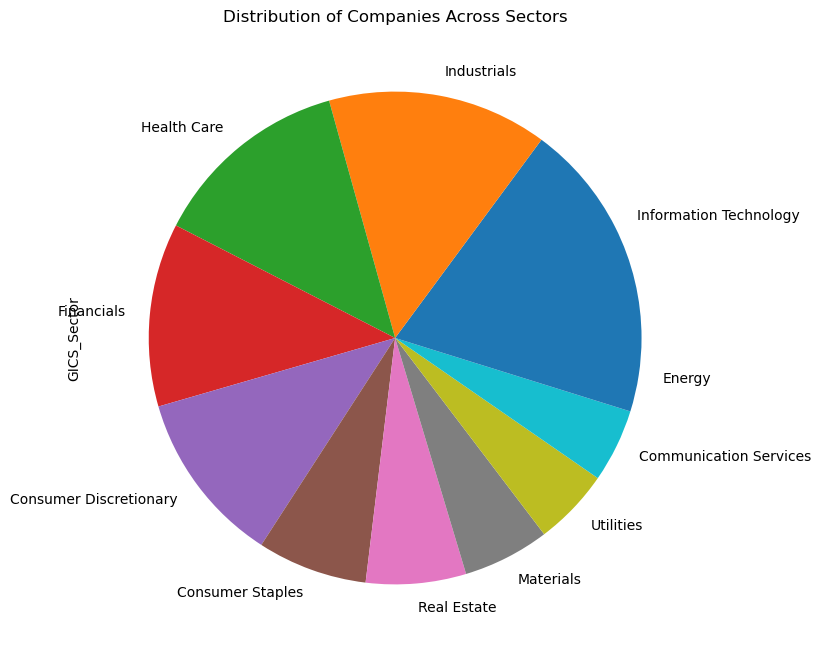

In [11]:
gics_sector_counts = df['GICS_Sector'].value_counts()
pie_plot = gics_sector_counts.plot.pie(figsize=(10, 8))
pie_plot.set_title('Distribution of Companies Across Sectors')
plt.show()